In [48]:
import numpy as np
import matplotlib.pyplot as plt

Part 1

C:\Users\debik\AppData\Local\Temp\ipykernel_15668\2495914522.py:11: RuntimeWarning: divide by zero encountered in divide
  pot = -G*M/(np.sqrt((xm-x)**2+(ym-y)**2))


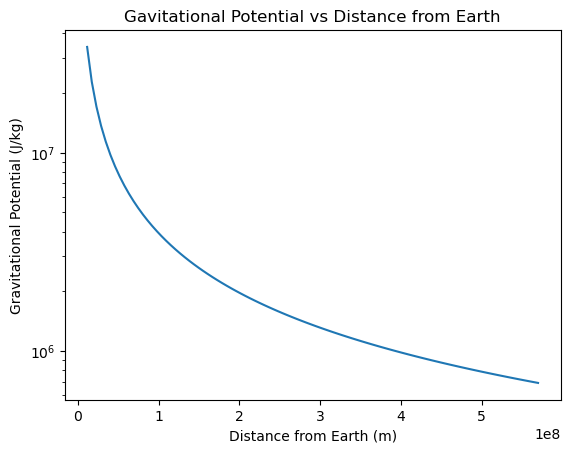

In [49]:
xm = 0
ym = 0
M = 5.9e24 #m
G = 6.67e-11 #m^3/kg/s^2
m_dist = 3.8e8

x = np.linspace(0, 1.5*m_dist, 100)
y = 0

def gravpot(M, xm, ym, x, y):
    pot = -G*M/(np.sqrt((xm-x)**2+(ym-y)**2))
    return pot

potential = np.where(x < 6.37e6, np.nan, gravpot(M, xm, ym, x, y))

fig, ax1 = plt.subplots()

ax1.plot(x, np.absolute(potential))
ax1.set_yscale('log')
ax1.set_xlabel("Distance from Earth (m)")
ax1.set_ylabel("Gravitational Potential (J/kg)")
ax1.set_title("Gavitational Potential vs Distance from Earth")
plt.savefig("Q1_GravPot_vs_dist_plot.png")

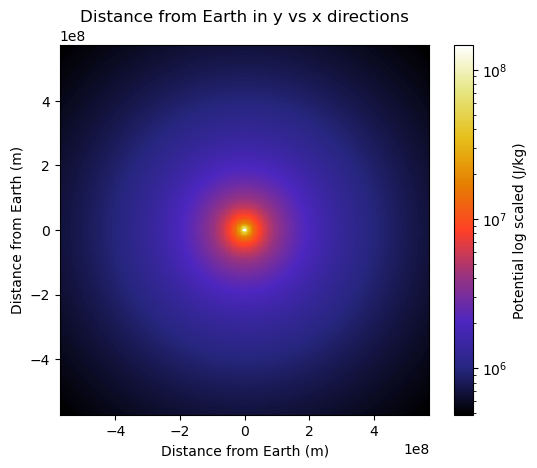

In [50]:
import matplotlib.cm as cm
x = np.linspace(-1.5*m_dist, 1.5*m_dist, 300)
y = x.copy()

x_grid, y_grid = np.meshgrid(x,y)
potential = gravpot(M, xm, ym, x_grid, y_grid)

fig, ax = plt.subplots(1, 1)
mesh = ax.pcolormesh(x_grid, y_grid, abs(potential), cmap = cm.CMRmap, norm = 'log')

ax.set_aspect("equal")

cbar = fig.colorbar(mesh)
cbar.set_label("Potential log scaled (J/kg)")
ax.set_xlabel("Distance from Earth (m)")
ax.set_ylabel("Distance from Earth (m)")
ax.set_title("Distance from Earth in y vs x directions")
plt.savefig("Q1_distfromearth_meshplot.png")

Part 2

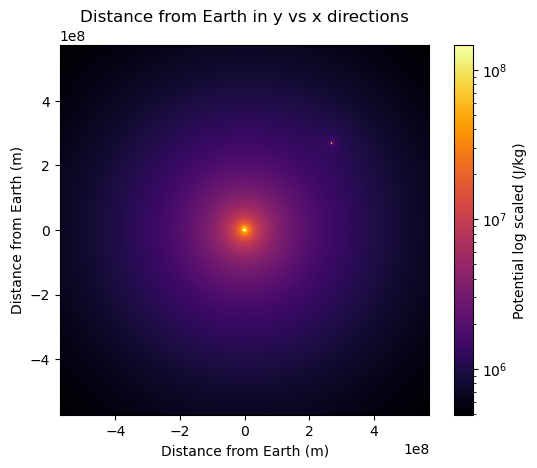

In [51]:
import matplotlib.cm as cm
xe = 0
ye = 0
xm = (3.8e8)/(np.sqrt(2))
ym = (3.8e8)/(np.sqrt(2))
M = 5.9e24 #kg
M_moon = 7.3e22 #kg
    
x = np.linspace(-1.5*m_dist, 1.5*m_dist, 300)
y = x.copy()

x_grid, y_grid = np.meshgrid(x,y)
earth_pot = abs(gravpot(M, xe, ye, x_grid, y_grid))
moon_pot = abs(gravpot(M_moon, xm, ym, x_grid, y_grid))
comb_pot = moon_pot + earth_pot

fig, ax = plt.subplots(1, 1)
mesh = ax.pcolormesh(x_grid, y_grid, abs(comb_pot), cmap = cm.inferno, norm = 'log')

ax.set_aspect("equal")

cbar = fig.colorbar(mesh)
cbar.set_label("Potential log scaled (J/kg)")
ax.set_xlabel("Distance from Earth (m)")
ax.set_ylabel("Distance from Earth (m)")
ax.set_title("Distance from Earth in y vs x directions")
plt.savefig("Q2_distfromearth+moon_meshplot.png")

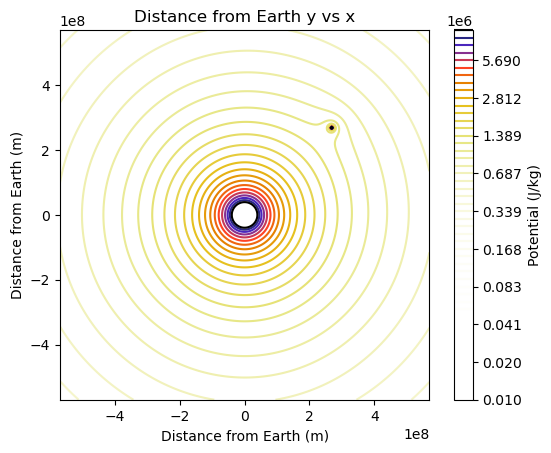

In [52]:
fig_contour, ax_contour = plt.subplots(1,1)

comb_pot = moon_pot + earth_pot

lvl = np.logspace(4, 7, 50)
contour = ax_contour.contour(x_grid, y_grid, comb_pot, cmap = cm.CMRmap_r, levels = lvl)
ax_contour.set_aspect("equal")
ax_contour.set_xlabel("Distance from Earth (m)")
ax_contour.set_ylabel("Distance from Earth (m)")
ax_contour.set_title("Distance from Earth y vs x")

cbar = fig_contour.colorbar(contour)
cbar.set_label("Potential (J/kg)")
plt.savefig("Q2_distfromearth+moon_contourplot.png")

Part 3

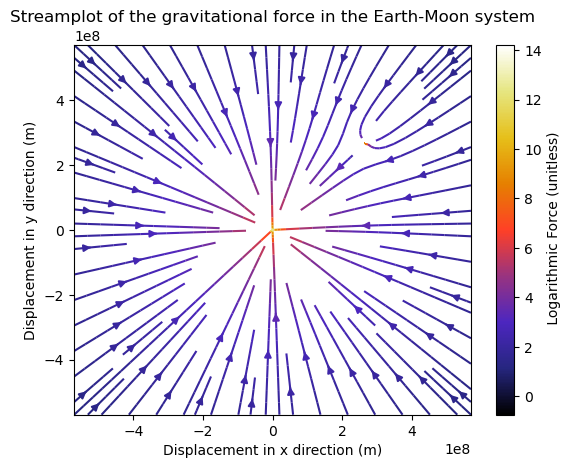

In [53]:
import matplotlib.cm as cm

G = 6.673e-11
m_earth = 5.9e24
m_moon = 7.3e22
m_mod = 5.5e3 #kg
xm = 3.8e8/np.sqrt(2) #m
ym = 3.8e8/np.sqrt(2) #m
xe = 0 #m
ye = 0 #m

def f_grav(G, m1, m2, x1, y1, x2, y2):
    r = np.sqrt((x2-x1)**2+(y2-y1)**2)
    r2 = r**2
    rhat_x = (x2-x1)/r
    rhat_y = (y2-y1)/r
    Fx = np.where(np.isclose(rhat_x, np.inf) is True, np.nan, -G*m1*m2*rhat_x/(r2))
    Fy = np.where(np.isclose(rhat_y, np.inf) is True, np.nan, -G*m1*m2*rhat_y/(r2))
    return Fx, Fy

Fx_earth = f_grav(G, m_earth, m_mod, xe, ye, x_grid, y_grid)[0]
Fy_earth = f_grav(G, m_earth, m_mod, xe, ye, x_grid, y_grid)[1]
Fx_moon = f_grav(G, m_moon, m_mod, xm, ym, x_grid, y_grid)[0]
Fy_moon = f_grav(G, m_moon, m_mod, xm, ym, x_grid, y_grid)[1]

colors = np.log(np.hypot(Fx_earth+Fx_moon, Fy_earth+Fy_moon))

fig, ax = plt.subplots()
stream = ax.streamplot(x_grid, y_grid, Fx_earth + Fx_moon, Fy_earth + Fy_moon, cmap = cm.CMRmap, color = colors)
ax.set_xlabel("Displacement in x direction (m)")
ax.set_ylabel("Displacement in y direction (m)")
ax.set_title("Streamplot of the gravitational force in the Earth-Moon system")
cbar = fig.colorbar(stream.lines, label = " Logarithmic Force (unitless)")
plt.savefig("Q3_gravpot_earth+moon_streamplot.png")

Part 4

In [57]:
m0 = 2.8e6 #kg
mf = 7.5e5 #kg
m_dot = 1.3e4 #kg/s
T = (m0-mf)/m_dot
print("The burn time for the first stage of the Saturn V rocket is:", T, "seconds")

The burn time for the first stage of the Saturn V rocket is: 157.69230769230768 seconds


In [58]:
from scipy.integrate import quad

t = np.linspace(0, T, 100)

def delta_v(t):
    m0 = 2.8e6 #kg
    mf = 7.5e5 #kg
    ve = 2.4e3 #m/s
    m_dot = 1.3e4 #kg/s
    g = 9.81 #m/s^2
    mt = m0-(m_dot*t)
    mt = np.where(mt<mf, mf, mt)
    delta = ve*np.log(m0/mt)-g*t
    return delta

height, err = quad(delta_v, 0, T)
print("I found the height of the rocket at burnout to be", height, "m")
print("I found the error in the height to be", err, "m")

I found the height of the rocket at burnout to be 74093.98013366401 m
I found the error in the height to be 5.848811185394151e-08 m
